### CREDIT CARD FRAUD DETECTION

Credit Card Fraud Detection is a classic class-imbalance problem where the number of fraud transactions is much lesser than the number of legitimate transaction for any bank. We can see this as an anomaly detection problem. We try to address the following questions as we proceed:

1. At what time do fraudulent transactions usually take place?
2. What are the general trens wrt transaction amount in fraudulent transactions?
3. As we are dealing with a highly imbalanced dataset, how do we prevent model overfitting on legitimate transactions?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_excel("C:\\Users\\Shreya Reddy\\Downloads\\creditcard.xlsx")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.205498e-16,-2.406306e-15,...,1.656562e-16,-3.568593e-16,2.610582e-16,4.473066e-15,5.213180e-16,1.683537e-15,-3.659966e-16,-1.223710e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### EDA:

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
def countplot_data(data, feature):
    plt.figure(figsize=(10,10))
    sn.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    sn.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

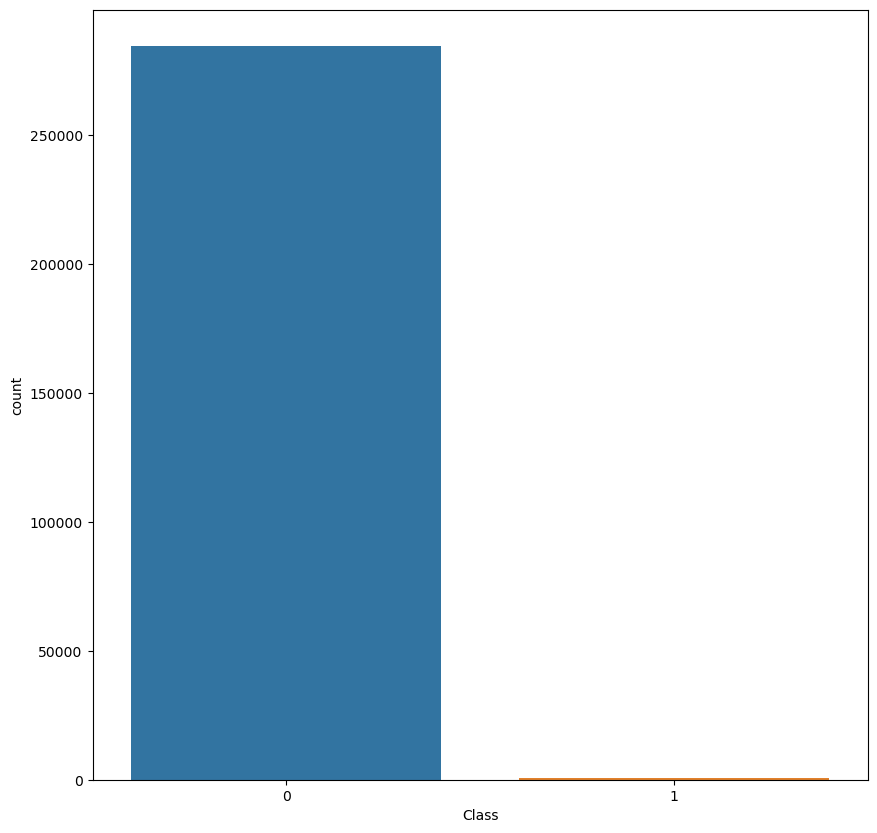

In [8]:
countplot_data(df, df.Class)

Looking at the plot, it is evident that the number of fraudulent transactions is negligible when compared to legitimate/normal transactions. This makes the dataset highly imbalanced. We have to implement techniques to prevent overfitting of the model by legitimate transactions(technique discussed later).

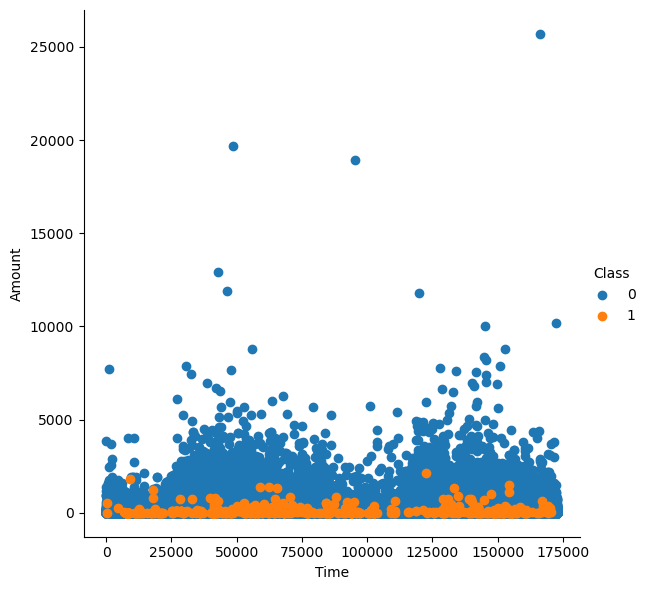

In [9]:
pairplot_data_grid(df, "Time", "Amount", "Class")

In [10]:
fraud = 0
legitimate = 1
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

492
283867


In [11]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This makes it clear that all the fraudulent transactions have a value of less than 2500

C:\Users\Shreya Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Shreya Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shreya Reddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level funct

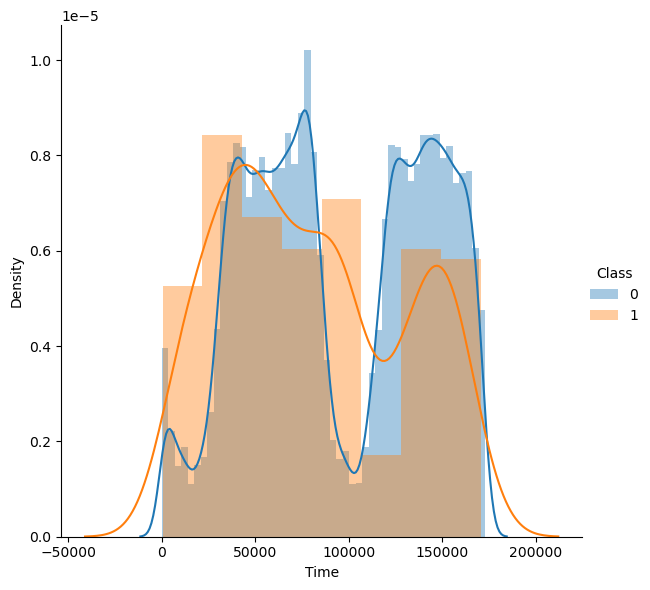

In [12]:
df_refine = df[["Time", "Amount", "Class"]]
sn.FacetGrid(df_refine, hue="Class", height=6).map(sn.distplot,"Time").add_legend()
plt.show()

This plot implies that fraudulent transactions are spread all over the interval considered and not limited certain periods

#### Modelling:

<Axes: >

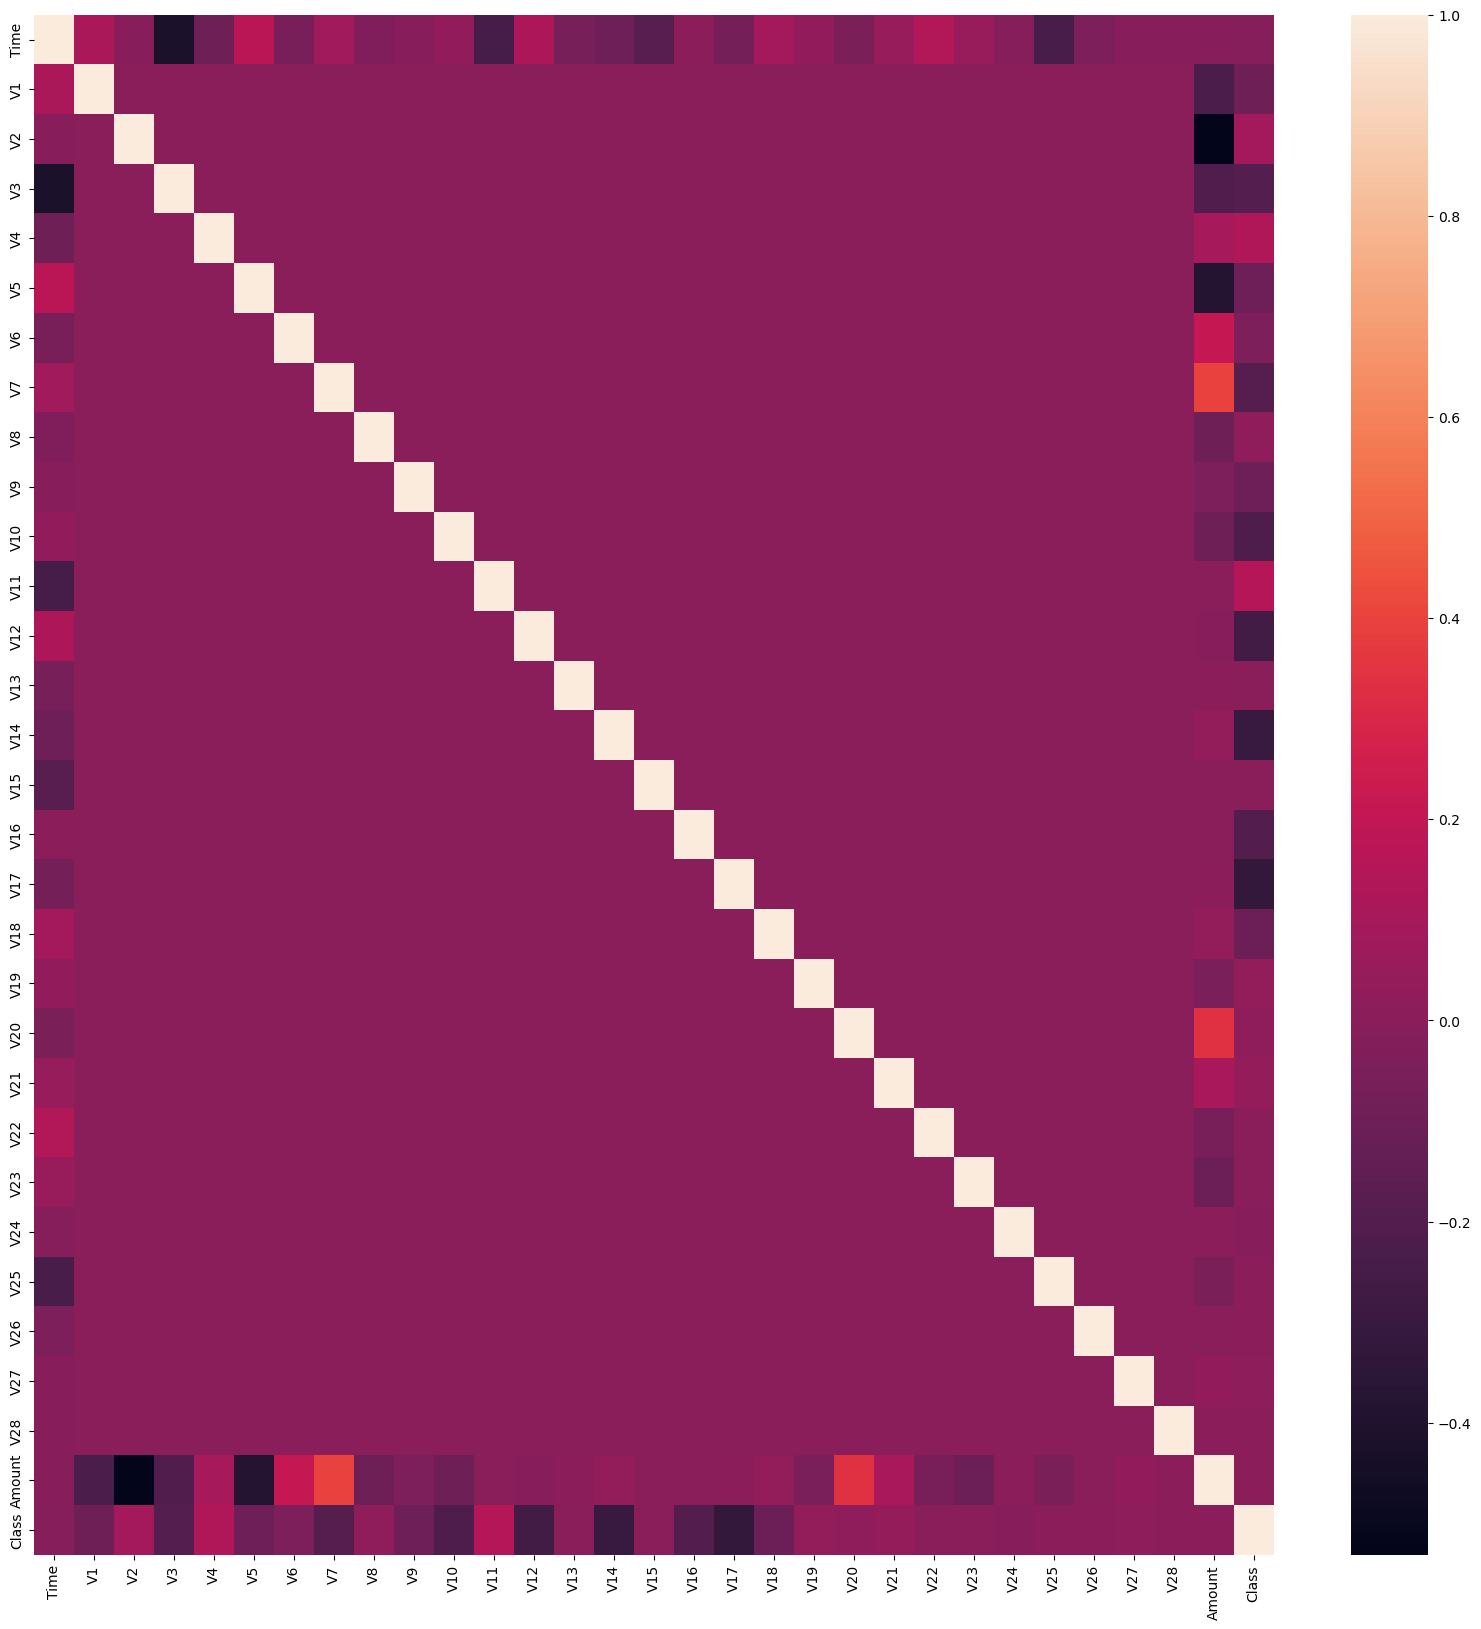

In [13]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sn.heatmap(df_corr)

The correlation matrix indicates that the features are hardly correlated to each other

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(labels='Class', axis=1) 
y = df.loc[:,'Class']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

#### How will you balance the fraud and legitimate transactions in data?

In [50]:
# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [51]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [52]:
mutual_infos.sort_values(ascending=False)

V14       0.561046
V10       0.484762
V12       0.483624
V17       0.456081
V11       0.450836
V4        0.437359
V3        0.403750
Amount    0.391952
V16       0.369933
V7        0.333241
V2        0.309200
V9        0.303415
V21       0.272365
V27       0.254583
V1        0.246124
Time      0.242364
V18       0.231686
V6        0.205141
V8        0.182458
V28       0.181247
V5        0.178178
V20       0.127822
V19       0.119096
V24       0.077276
V23       0.071128
V26       0.065074
V25       0.044254
V22       0.038835
V15       0.030306
V13       0.028590
dtype: float64

The top 5 features are V14, V10, V12, V17, V11 

In [70]:
X_res_top5=X_res[['V14', 'V10', 'V12', 'V17', 'V11']]
y_res_top5=y_res
X_test_top5=X_test[['V14', 'V10', 'V12', 'V17', 'V11']]
y_test_top5=y_test

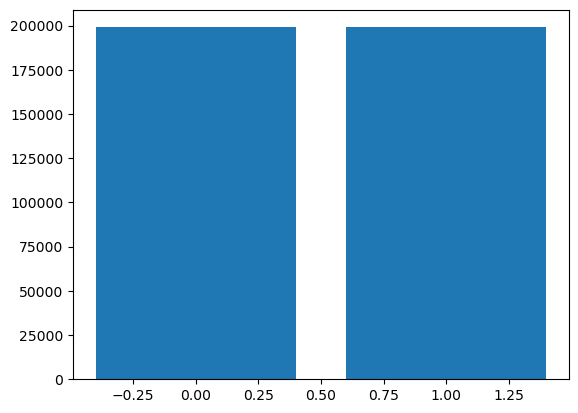

In [56]:
plt.bar(y_res.value_counts().index,y_res.value_counts())
plt.show()

In [54]:
y_res.value_counts()

Class
0    199007
1    199007
Name: count, dtype: int64

#### Evaluation:

We make use of AUC-ROC Score, Classification Report, Accuracy and F1-Score to evaluate the performance of the classifiers

In [57]:
#functions for evaluating the model
def grid_eval(grid_clf):
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)
    
def evaluation(y_test, grid_clf, X_test):
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))
    
    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))
      
    print('F1-Score')
    print(f1_score(y_test, y_pred))
    
    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

In [61]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

#with all the features
grid_sgd.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Shreya Reddy\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [59]:
grid_eval(grid_sgd)

Best Score 0.9641419452105187
Best Parameter {'model__alpha': 0.001, 'model__loss': 'log', 'model__penalty': 'l1'}


In [60]:
evaluation(y_test, grid_sgd, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85308
           1       0.13      0.85      0.23       135

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.61     85443
weighted avg       1.00      0.99      0.99     85443

AUC-ROC
0.9215535341221092
F1-Score
0.23092369477911648
Accuracy
0.9910349589785002


In [67]:
#with top 5 features
grid_sgd.fit(X_res_top5, y_res_top5)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Shreya Reddy\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [68]:
grid_eval(grid_sgd)

Best Score 0.9360174032813319
Best Parameter {'model__alpha': 0.001, 'model__loss': 'log', 'model__penalty': 'l1'}


In [71]:
evaluation(y_test_top5, grid_sgd, X_test_top5)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85308
           1       0.11      0.84      0.19       135

    accuracy                           0.99     85443
   macro avg       0.55      0.91      0.59     85443
weighted avg       1.00      0.99      0.99     85443

AUC-ROC
0.9131497371615532
F1-Score
0.19415807560137457
Accuracy
0.9890219210467798


In [72]:
#with all features

pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [73]:
grid_eval(grid_rf)

Best Score 0.9997538074045276
Best Parameter {'model__n_estimators': 75}


In [74]:
evaluation(y_test, grid_rf, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.86      0.80      0.83       135

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.8999003610446852
F1-Score
0.8307692307692307
Accuracy
0.9994850368081645


In [75]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Shreya Reddy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [76]:
grid_eval(grid_lr)

Best Score 0.9534945741304262
Best Parameter {'model__class_weight': None, 'model__penalty': 'l2'}


In [77]:
evaluation(y_test, grid_lr, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.84      0.14       135

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.56     85443
weighted avg       1.00      0.98      0.99     85443

AUC-ROC
0.9139228833559964
F1-Score
0.13693693693693693
Accuracy
0.983181770303009


In [78]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [79]:
grid_eval(grid_knn)

Best Score 0.907398549502506
Best Parameter {'model__p': 2}


In [80]:
evaluation(y_test, grid_knn, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85308
           1       0.01      0.44      0.02       135

    accuracy                           0.94     85443
   macro avg       0.51      0.69      0.50     85443
weighted avg       1.00      0.94      0.97     85443

AUC-ROC
0.690924389011321
F1-Score
0.024071807425540596
Accuracy
0.9440094565967955


Amongst all the models, Logistic Regression & SGD Classifier models performed the best with AUC_ROC scores of 0.91392, 0.91315 respectively. In anomaly detection, AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is generally considered a more appropriate evaluation metric than accuracy. Accuracy can be misleading in imbalanced datasets. If the dataset contains 95% normal observations and 5% anomalies, a model that always predicts "normal" would achieve 95% accuracy. However, this model is not useful for detecting anomalies. AUC-ROC measures the ability of the model to distinguish between the classes (normal vs. anomaly). It plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various thresholds. The AUC value represents the area under the ROC curve. An AUC of 0.5 indicates no discrimination (similar to random guessing), while an AUC of 1 indicates perfect discrimination between normal and anomalous cases. 

In [82]:
#with top 5 features
#RandomForest
grid_rf.fit(X_res_top5, y_res_top5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [83]:
grid_eval(grid_rf)

Best Score 0.9955882638588556
Best Parameter {'model__n_estimators': 75}


In [84]:
evaluation(y_test_top5, grid_rf, X_test_top5)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.36      0.51       135

    accuracy                           1.00     85443
   macro avg       0.91      0.68      0.75     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.6814228703312962
F1-Score
0.5051546391752578
Accuracy
0.9988764439450862


In [86]:
#with top 5 features
#Logistic Regression
grid_lr.fit(X_res_top5, y_res_top5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [87]:
grid_eval(grid_lr)

Best Score 0.9390087820032557
Best Parameter {'model__class_weight': None, 'model__penalty': 'l2'}


In [88]:
evaluation(y_test_top5, grid_lr, X_test_top5)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.37      0.51       135

    accuracy                           1.00     85443
   macro avg       0.92      0.69      0.76     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.685126574035
F1-Score
0.5128205128205128
Accuracy
0.9988881476539916


In [89]:
#with top 5 features
#Logistic Regression
grid_knn.fit(X_res_top5, y_res_top5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [90]:
grid_eval(grid_knn)

Best Score 0.9911056549980597
Best Parameter {'model__p': 2}


In [91]:
evaluation(y_test_top5, grid_knn, X_test_top5)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.82      0.38      0.52       135

    accuracy                           1.00     85443
   macro avg       0.91      0.69      0.76     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.6888244166236851
F1-Score
0.5177664974619289
Accuracy
0.9988881476539916


We may observe that the model performed poorly when only the top 5 models were used for training rather than all of them. This behaviour may be attributed to:
1. Low to almost no correlation amongst the independent features but a significant correlation with the target variable, hence, removing most of them would mean losing valuable information that contributes to the model's predictive power
2. In some cases, models trained with a smaller number of features may overfit to the training data, leading to poor generalization.